In [20]:
# Import Required packages
import urllib.request
import rasterio
import math
import matplotlib.pyplot as plt

# Define a function to calculate the x, y, and z values for an Esri satellite tile based on a latitude, longitude, and zoom level

def lat_lng_to_tile(lat, lng, zoom):
    """
    Calculates the x, y, and z values for an Esri satellite tile based on a latitude, longitude, and zoom level.
    """
    x = int((lng + 180) / 360 * (2 ** zoom))
    y = int((1 - math.log(math.tan(lat * math.pi / 180) + 1 / math.cos(lat * math.pi / 180)) / math.pi) / 2 * (2 ** zoom))
    z = zoom
    return x, y, z

# The URL of the Esri satellite tile server
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'

# A list of locations to retrieve satellite tiles for
locations = [
    [38.64879, -77.29667], # 1 crash site
]

# define a function that will return a bounding box 100m radius from the location
def make_bbox(lat, lon, radius=100):
    """
    Creates a bounding box of a specified radius around a point.
    """
    # Convert the radius from meters to degrees
    radius = radius / 111000

    # Create the bounding box
    bbox = [lon - radius, lat - radius, lon + radius, lat + radius]

    return bbox

# define a function that will retrieve the lat lon for a position 30m away with a parameter to define whether it is north, south, east, or west
def get_lat_lon(lat, lon, direction, distance=30):
    """
    Returns the latitude and longitude of a point that is a specified distance away from another point in a specified direction.
    """
    # Convert the distance from meters to degrees
    distance = distance / 111000

    # Calculate the latitude and longitude of the new point
    if direction == 'north':
        new_lat = lat + distance
        new_lon = lon
    elif direction == 'south':
        new_lat = lat - distance
        new_lon = lon
    elif direction == 'east':
        new_lat = lat
        new_lon = lon + distance
    elif direction == 'west':
        new_lat = lat
        new_lon = lon - distance

    return new_lat, new_lon

# define a function that will restrict the image output to bounding box
def crop_image(image, bbox):
    """
    Crops an image to a bounding box.
    """
    # Get the image bounds
    bounds = image.bounds

    # Calculate the pixel size in the x and y directions
    x_res = (bounds[2] - bounds[0]) / image.width
    y_res = (bounds[3] - bounds[1]) / image.height

    # Calculate the pixel coordinates of the bounding box
    x_min = int((bbox[0] - bounds[0]) / x_res)
    y_min = int((bbox[1] - bounds[1]) / y_res)
    x_max = int((bbox[2] - bounds[0]) / x_res)
    y_max = int((bbox[3] - bounds[1]) / y_res)

    # Crop the image
    cropped_image = image.read(window=((0, 3), (y_min, y_max), (x_min, x_max)))

    return cropped_image

In [21]:
# Iterate over zoom levels, save the image tiles, and plot the images for each location
for zoom in range(17, 20):
    # Iterate over the locations and retrieve the satellite tiles for each location
    for location in locations:
        # Calculate the x, y, and z values for the tile based on the location
        x, y, z = lat_lng_to_tile(location[0], location[1], zoom)

        # Construct the URL of the tile
        tile_url = f'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}'

        # Download the tile and save it to a tif file
        urllib.request.urlretrieve(tile_url, f'{x}_{y}_{z}.tif')

        # Open the tile file and create a raster dataset from it
        with rasterio.open(f'{x}_{y}_{z}.tif') as src:
            raster = src.read()
        
        # make a bounding box around the location
        bbox = make_bbox(location[0], location[1], radius=100)

        # Crop the image to the bounding box
        src = crop_image(src, bbox)
        
        # Extract the lat lon bounds of the image
        bounds = src.bounds

        # Calculate the center of the image
        center = [(bounds[0] + bounds[2]) / 2, (bounds[1] + bounds[3]) / 2]
    
        # Plot the raster dataset
        plt.imshow(raster.transpose([1, 2, 0]))
        plt.show()

TypeError: from_slices() got multiple values for argument 'height'

In [8]:
first_band = raster[0]
second_band = raster[1]
third_band = raster[2]
print(first_band.shape)
print(raster.shape)

(256, 256)
(3, 256, 256)


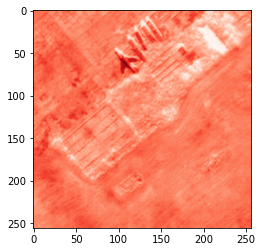

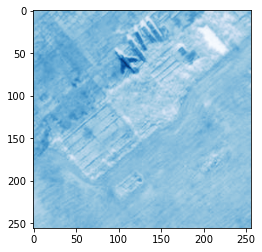

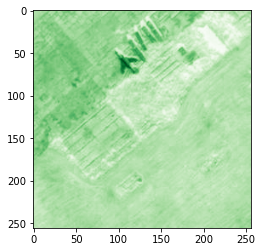

In [3]:
# Display the raster data using Matplotlib
plt.imshow(raster[0], 'Reds')
plt.show()
plt.imshow(raster[1], cmap='Blues')
plt.show()
plt.imshow(raster[2], cmap='Greens')
plt.show()

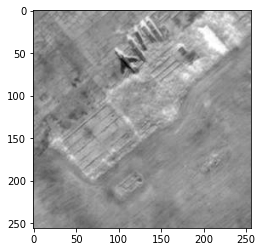

<AxesSubplot:>

In [4]:
import rasterio.plot

rasterio.plot.show(raster[0], cmap='gray_r')